<a href="https://colab.research.google.com/github/isiva-m/AI4CCEE_Fall_2024/blob/main/Lecture_6_Siva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of raw JSON RDD:
First 5 rows of parsed JSON RDD:
Number of data points with speed > 30 mph: 0
Filtered data points (latitude, longitude, speed):


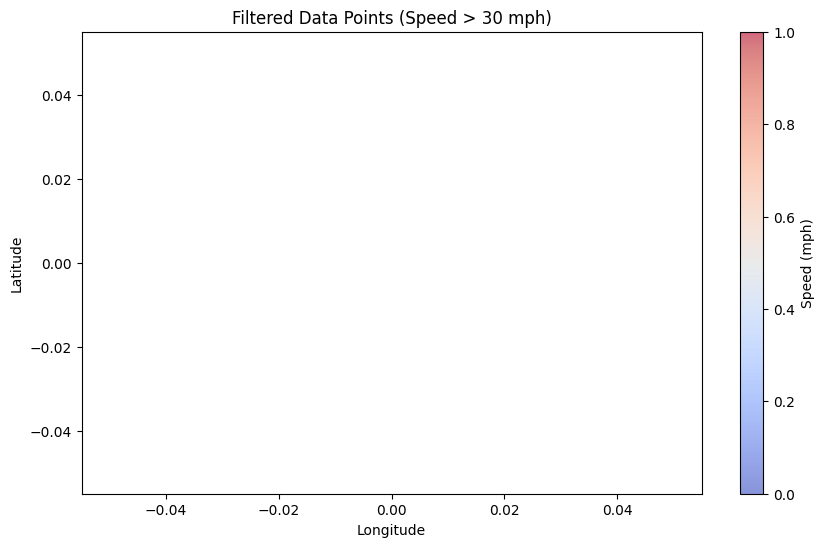

In [13]:
# 1. Install PySpark
!pip install pyspark

# 2. Create Spark Session
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("/content/wejo.json").getOrCreate()

# 4. Load the uploaded JSON file into an RDD
rdd = spark.sparkContext.textFile("/content/wejo.json")

# 5. Inspect the first few rows of the RDD
print("First 5 rows of raw JSON RDD:")
rdd.take(5)

# 6. Parse JSON strings into Python dictionaries
import json

# Parse the JSON strings into Python dictionaries
parsed_rdd = rdd.map(lambda x: json.loads(x))

# Inspect the first few parsed rows
print("First 5 rows of parsed JSON RDD:")
parsed_rdd.take(5)

# 7. Extract Key Information (latitude, longitude, speed)
extracted_rdd = parsed_rdd.map(lambda x: (x.get('latitude'), x.get('longitude'), x.get('speed')))
extracted_rdd.take(5)

# 8. Filter Data Points with Speed > 30 mph
filtered_rdd = extracted_rdd.filter(lambda x: x[2] is not None and x[2] > 30)
filtered_rdd.take(5)

# 9. Count the Number of Data Points with Speed > 30 mph
count = filtered_rdd.count()
print(f"Number of data points with speed > 30 mph: {count}")

# 10. Collect and Display Filtered Data Points
filtered_data = filtered_rdd.collect()
print("Filtered data points (latitude, longitude, speed):")
for data in filtered_data[:5]:  # Showing the first 5 rows
    print(data)

# 11. Plot the Filtered Data using Matplotlib
import matplotlib.pyplot as plt

latitudes = [point[0] for point in filtered_data]
longitudes = [point[1] for point in filtered_data]
speeds = [point[2] for point in filtered_data]

plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, c=speeds, cmap='coolwarm', s=50, alpha=0.6, edgecolor='k')
plt.colorbar(label='Speed (mph)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Filtered Data Points (Speed > 30 mph)')
plt.show()

+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

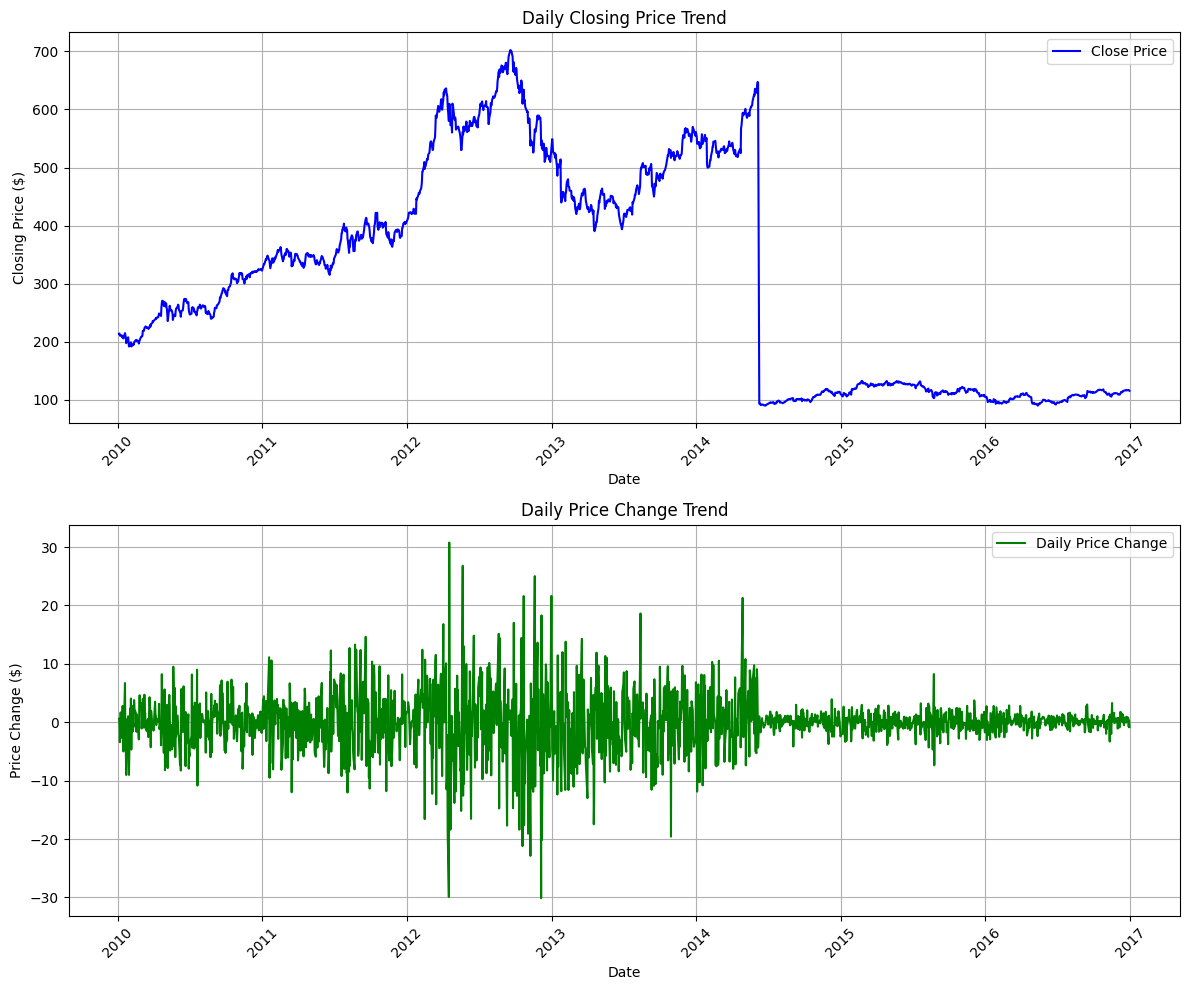

In [18]:

# 1. Install PySpark
!pip install pyspark

# 2. Create Spark Session
from pyspark.sql import SparkSession

# 2. Load the CSV File into PySpark and Show the First 20 Rows of the DataFrame
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("/content/apple_stock.csv").getOrCreate()

# Load the uploaded CSV file into a PySpark DataFrame
df = spark.read.csv("/content/apple_stock.csv", header=True, inferSchema=True)

# Show the first 20 rows of the DataFrame
df.show(20)

# 3. Print the Schema of the DataFrame
df.printSchema()

# 4. Get the Number of Rows in the DataFrame
row_count = df.count()
print(f"Number of rows in the DataFrame: {row_count}")

# 5. Perform Some Basic Descriptive Statistics
df.describe().show()

# 6. Select Key Columns: ("Date", "Open", "Close", "Volume")
df_selected = df.select("Date", "Open", "Close", "Volume")
df_selected.show(5)

# 7. Calculate Daily Price Change
from pyspark.sql.functions import col

df_with_change = df_selected.withColumn("Price_Change", col("Close") - col("Open"))
df_with_change.show(5)

# 8. Calculate Average Daily Volume
from pyspark.sql.functions import avg

avg_volume = df_with_change.agg(avg("Volume")).collect()[0][0]
print(f"Average Daily Volume: {avg_volume}")

# 9. Find Maximum and Minimum Closing Prices
from pyspark.sql.functions import max, min

max_close = df_with_change.agg(max("Close")).collect()[0][0]
print(f"Maximum Closing Price: {max_close}")

min_close = df_with_change.agg(min("Close")).collect()[0][0]
print(f"Minimum Closing Price: {min_close}")

# 10. Plot the Daily Price Trends
import pandas as pd
import matplotlib.pyplot as plt

# Combine both closing price and price change data into one Pandas DataFrame
df_plot_combined = df_with_change.select("Date", "Close", "Price_Change").toPandas()

# Convert 'Date' to datetime and sort the data
df_plot_combined['Date'] = pd.to_datetime(df_plot_combined['Date'])
df_plot_combined = df_plot_combined.sort_values("Date")

# Create two subplots: one for closing price and one for price change
plt.figure(figsize=(12, 10))

# First subplot: Closing Price
plt.subplot(2, 1, 1)
plt.plot(df_plot_combined['Date'], df_plot_combined['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('Daily Closing Price Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Second subplot: Daily Price Change
plt.subplot(2, 1, 2)
plt.plot(df_plot_combined['Date'], df_plot_combined['Price_Change'], label='Daily Price Change', color='g')
plt.xlabel('Date')
plt.ylabel('Price Change ($)')
plt.title('Daily Price Change Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

+-------------------+---------+----------+-----------+-------+--------+---+----+--------+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+
|  capturedtimestamp| latitude| longitude|      speed|geohash|   month|day|hour|      ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|         date_time1|          

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


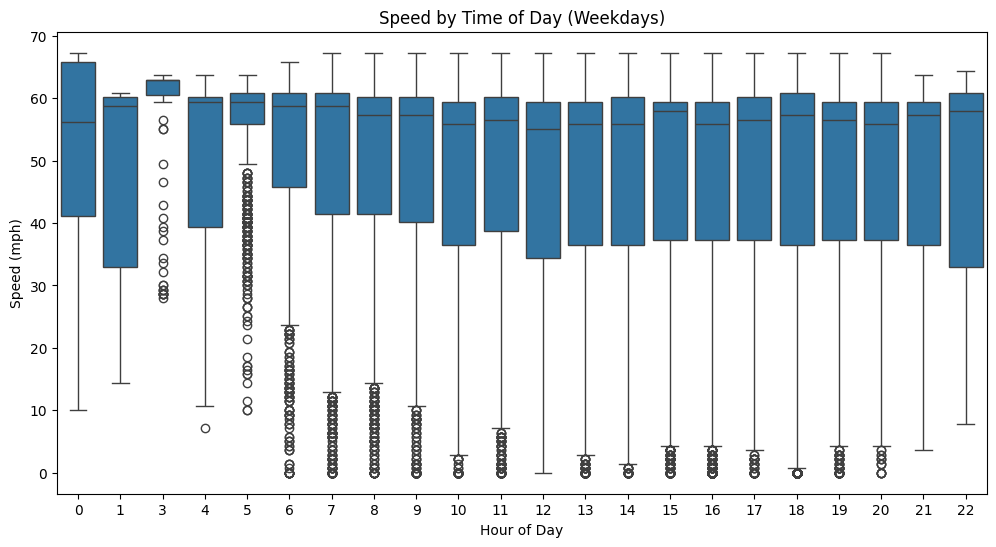

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


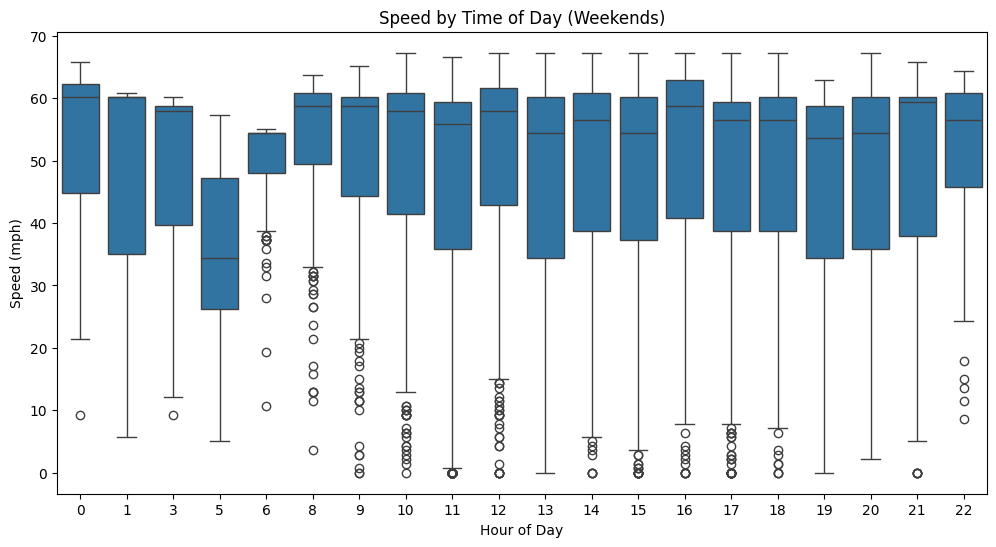

In [25]:
# 1. Import necessary libraries
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.types import IntegerType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pandas as pd

# 2. Initialize the Spark Session
spark = SparkSession.builder.appName("/content/ID_31_data.csv").getOrCreate()

# Set logging level
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


# 4. Load CSV File Using PySpark
df = spark.read.csv("/content/ID_31_data.csv", header=True, inferSchema=True)

# Show the first few rows
df.show(5)

# 5. Ensure 'speed' is of Type Double and 'ID' is Integer
df = df.withColumn("speed", df["speed"].cast(DoubleType()))
df = df.withColumn("ID", df["ID"].cast(IntegerType()))

# Verify the schema
df.printSchema()

# 6. Convert Timestamp to Spark Timestamp Type
# Check for typos or alternative column names. If 'capturedtimestamp' is the correct column:
df = df.withColumn("timestamp", F.to_timestamp(df["capturedtimestamp"], "yyyy-MM-dd HH:mm:ss"))

# Show the first few rows to verify
df.show(5)

# 7. Extract Hour and Day of the Week
df = df.withColumn("hour", F.hour(df["timestamp"]))
df = df.withColumn("day_of_week", F.date_format(df["timestamp"], 'E'))  # Day of week as a string

# Show updated data
df.show(5)

# 8. Compute Required Statistics
# Speed limit thresholds
limit_5 = 30 + 5
limit_10 = 30 + 10
limit_20 = 30 + 20

# Compute statistics
fraction_5_over_limit = df.filter(df["speed"] > limit_5).count() / df.count()
fraction_10_over_limit = df.filter(df["speed"] > limit_10).count() / df.count()
fraction_20_over_limit = df.filter(df["speed"] > limit_20).count() / df.count()

# 9. Log the Statistics
logger.info(f"Fraction over 5 mph limit: {fraction_5_over_limit * 100:.2f}%")
logger.info(f"Fraction over 10 mph limit: {fraction_10_over_limit * 100:.2f}%")
logger.info(f"Fraction over 20 mph limit: {fraction_20_over_limit * 100:.2f}%")

# 10. Calculate 50th Percentile (Median) Speed per Journey
median_speeds = df.groupBy("ID").agg(F.expr('percentile_approx(speed, 0.5)').alias('median_speed'))

# Show the median speeds
median_speeds.show(5)

# 11. Print All Statistics
print(f"Fraction over 5 mph limit: {fraction_5_over_limit * 100:.2f}%")
print(f"Fraction over 10 mph limit: {fraction_10_over_limit * 100:.2f}%")
print(f"Fraction over 20 mph limit: {fraction_20_over_limit * 100:.2f}%")

# 12. Convert to Pandas DataFrame for Plotting
df_pd = df.toPandas()

# Display the Pandas DataFrame
df_pd.head()

# 13. Use Boxplots to Plot Speed by Time of Day (Weekdays)
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
df_weekdays = df_pd[df_pd['day_of_week'].isin(weekdays)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='speed', data=df_weekdays)
plt.title('Speed by Time of Day (Weekdays)')
plt.xlabel('Hour of Day')
plt.ylabel('Speed (mph)')
plt.show()

# 14. Use Boxplots to Plot Speed by Time of Day (Weekends)
weekends = ['Sat', 'Sun']
df_weekends = df_pd[df_pd['day_of_week'].isin(weekends)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='speed', data=df_weekends)
plt.title('Speed by Time of Day (Weekends)')
plt.xlabel('Hour of Day')
plt.ylabel('Speed (mph)')
plt.show()


+-------------------+---------+----------+-----------+-------+--------+---+----+--------+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+
|  capturedtimestamp| latitude| longitude|      speed|geohash|   month|day|hour|      ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|         date_time1|          

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


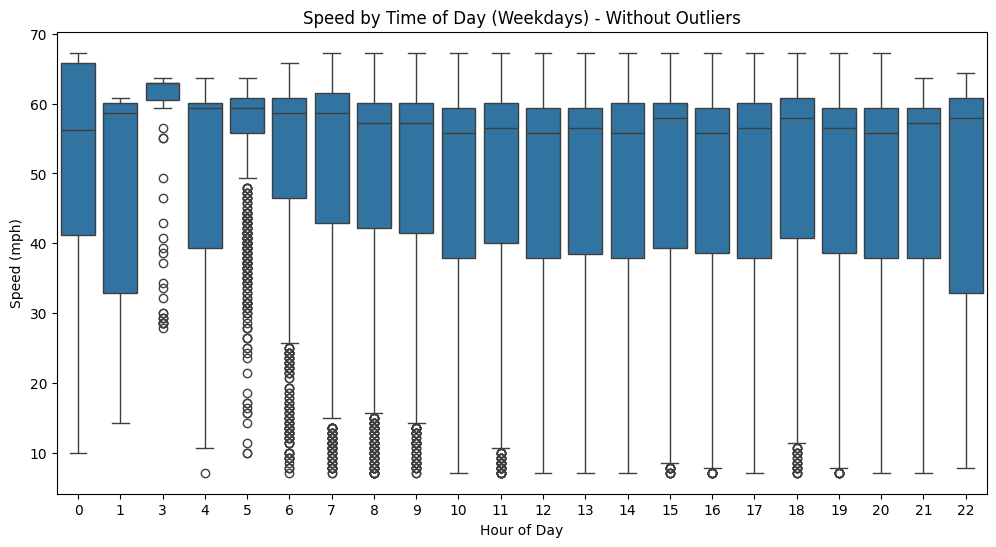

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


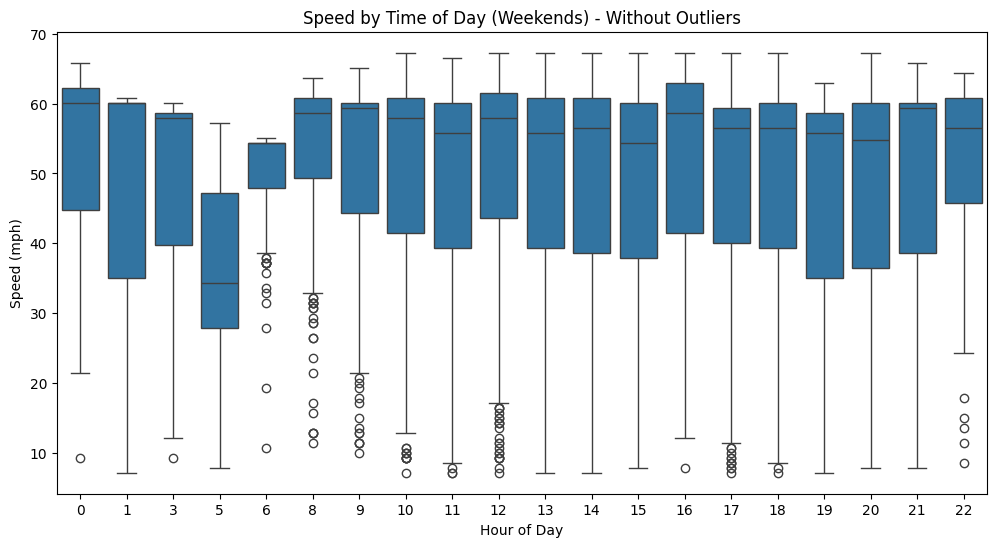

In [28]:
# 1. Import necessary libraries
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.types import IntegerType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pandas as pd

# 2. Initialize the Spark Session
spark = SparkSession.builder.appName("/content/ID_31_data.csv").getOrCreate()

# Set logging level
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


# 4. Load CSV File Using PySpark
df = spark.read.csv("/content/ID_31_data.csv", header=True, inferSchema=True)

# Show the first few rows
df.show(5)

# 5. Ensure 'speed' is of Type Double and 'ID' is Integer
df = df.withColumn("speed", df["speed"].cast(DoubleType()))
df = df.withColumn("ID", df["ID"].cast(IntegerType()))

# Verify the schema
df.printSchema()

# 6. Convert Timestamp to Spark Timestamp Type
df = df.withColumn("timestamp", F.to_timestamp(df["capturedtimestamp"], "yyyy-MM-dd HH:mm:ss"))

# Show the first few rows to verify
df.show(5)

# 7. Extract Hour and Day of the Week
df = df.withColumn("hour", F.hour(df["timestamp"]))
df = df.withColumn("day_of_week", F.date_format(df["timestamp"], 'E'))  # Day of week as a string

# Show updated data
df.show(5)

# 8. Compute Required Statistics
# Speed limit thresholds
limit_5 = 30 + 5
limit_10 = 30 + 10
limit_20 = 30 + 20

# Compute statistics
fraction_5_over_limit = df.filter(df["speed"] > limit_5).count() / df.count()
fraction_10_over_limit = df.filter(df["speed"] > limit_10).count() / df.count()
fraction_20_over_limit = df.filter(df["speed"] > limit_20).count() / df.count()

# 9. Log the Statistics
logger.info(f"Fraction over 5 mph limit: {fraction_5_over_limit * 100:.2f}%")
logger.info(f"Fraction over 10 mph limit: {fraction_10_over_limit * 100:.2f}%")
logger.info(f"Fraction over 20 mph limit: {fraction_20_over_limit * 100:.2f}%")

# 10. Calculate 50th Percentile (Median) Speed per Journey
median_speeds = df.groupBy("ID").agg(F.expr('percentile_approx(speed, 0.5)').alias('median_speed'))

# Show the median speeds
median_speeds.show(5)

# 11. Print All Statistics
print(f"Fraction over 5 mph limit: {fraction_5_over_limit * 100:.2f}%")
print(f"Fraction over 10 mph limit: {fraction_10_over_limit * 100:.2f}%")
print(f"Fraction over 20 mph limit: {fraction_20_over_limit * 100:.2f}%")

# 12. Convert to Pandas DataFrame for Plotting
df_pd = df.toPandas()

# Display the Pandas DataFrame
df_pd.head()

# 13. Remove Outliers Based on IQR
Q1 = df_pd['speed'].quantile(0.25)
Q3 = df_pd['speed'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter DataFrame to remove outliers
df_pd_cleaned = df_pd[(df_pd['speed'] >= lower_bound) & (df_pd['speed'] <= upper_bound)]

# 14. Use Boxplots to Plot Speed by Time of Day (Weekdays)
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
df_weekdays = df_pd_cleaned[df_pd_cleaned['day_of_week'].isin(weekdays)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='speed', data=df_weekdays)
plt.title('Speed by Time of Day (Weekdays) - Without Outliers')
plt.xlabel('Hour of Day')
plt.ylabel('Speed (mph)')
plt.show()

# 15. Use Boxplots to Plot Speed by Time of Day (Weekends)
weekends = ['Sat', 'Sun']
df_weekends = df_pd_cleaned[df_pd_cleaned['day_of_week'].isin(weekends)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='speed', data=df_weekends)
plt.title('Speed by Time of Day (Weekends) - Without Outliers')
plt.xlabel('Hour of Day')
plt.ylabel('Speed (mph)')
plt.show()